<a href="https://colab.research.google.com/github/bruno-araujo83/dataset/blob/main/ProjetoDSpartelAraujo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Resumo**

O conjunto de dados utilizado contém registros detalhados de pedidos realizados em diferentes canais de vendas nos Estados Unidos. As informações abrangem desde dados logísticos — como datas de pedido, envio e entrega — até valores financeiros como custo, preço, desconto aplicado e quantidade pedida.

Cada linha representa um pedido único, identificado por OrderNumber, e associado a um canal de vendas, como Online, In-Store, Distributor, a um armazém (WarehouseCode) e a informações sobre produto, loja, equipe de vendas e cliente. Há também dados monetários como Unit Cost, Unit Price e o desconto aplicado (Discount Applied), permitindo calcular indicadores importantes como margem de lucro e receita por pedido.

Esse conjunto de dados é especialmente valioso para análises que busquem entender o desempenho comercial dos canais de venda, a eficiência logística dos armazéns, e a rentabilidade dos produtos comercializados. Com base nele, é possível responder a perguntas estratégicas, como: quais canais geram maior volume de vendas? Quais produtos têm maior saída por canal? Como os descontos impactam a margem de lucro? Certos armazéns concentram a maior parte dos pedidos?

Com base nas análises realizadas, foram desenvolvidas visualizações univariadas (como histogramas de preços unitários), bivariadas (como boxplots de quantidade por canal), e multivariadas (como gráficos de dispersão relacionando preço, desconto e canal, além de gráficos de barras cruzando produto e canal de venda).

Além disso, foram calculadas métricas fundamentais como receita total e margem bruta, permitindo avaliar a performance financeira dos diferentes canais. Esses indicadores ajudam a identificar padrões de comportamento, oportunidades de melhoria e áreas onde a estratégia comercial pode ser ajustada para obter melhores resultados.


**PERGUNTAS**

1. **Quais canais de venda geram maiores volumes de pedidos?**
   - R: Canais como Distribuidores e Varejo Físico (In-Store) concentram maiores volumes.
   
2. **Existe relação entre canal de venda e desconto aplicado?**
   - R: Vendas Online aplicam menos desconto, enquanto Distribuidores recebem maior abatimento.

3. **Qual é a margem média por canal de venda?**
   - R: O canal Online tende a ter maior margem, já que tem custos mais baixos.

4. **Certos armazéns têm maior giro de produtos?**
   - R: Armazéns mais próximos de grandes centros têm maior número de pedidos.

5. **Quais produtos têm maior volume de venda por canal?**
   - R: Alguns produtos são mais vendidos em canais específicos, ex: produto X via Distribuidor.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# prompt: leia o arquivo /content/US_Regional_Sales_Data.csvUS_Regional_sales_data.csv

import pandas as pd
df = pd.read_csv('/content/US_Regional_Sales_Data.csv')
df.head()


,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"


In [11]:
# prompt: substitua virgula por pontos nas colunas unit cost e unit price e Converta para float

df['Unit Cost'] = df['Unit Cost'].str.replace(',', '.').astype(float)
df['Unit Price'] = df['Unit Price'].str.replace(',', '.').astype(float)
df.head()

AttributeError: Can only use .str accessor with string values!

In [8]:
# Corrigir os formatos numéricos remover pontos de milhar e substituir vírgula decimal por ponto
df["Unit Cost"] = df["Unit Cost"].str.replace(".", "", regex=False).str.replace(",", ".", regex=False).astype(float)
df["Unit Price"] = df["Unit Price"].str.replace(".", "", regex=False).str.replace(",", ".", regex=False).astype(float)

# Verificar valores ausentes novamente
missing_values = df.isnull().sum()
dtypes = df.dtypes

missing_values, dtypes


(OrderNumber         0
 Sales Channel       0
 WarehouseCode       0
 ProcuredDate        0
 OrderDate           0
 ShipDate            0
 DeliveryDate        0
 CurrencyCode        0
 _SalesTeamID        0
 _CustomerID         0
 _StoreID            0
 _ProductID          0
 Order Quantity      0
 Discount Applied    0
 Unit Cost           0
 Unit Price          0
 dtype: int64,
 OrderNumber          object
 Sales Channel        object
 WarehouseCode        object
 ProcuredDate         object
 OrderDate            object
 ShipDate             object
 DeliveryDate         object
 CurrencyCode         object
 _SalesTeamID          int64
 _CustomerID           int64
 _StoreID              int64
 _ProductID            int64
 Order Quantity        int64
 Discount Applied    float64
 Unit Cost           float64
 Unit Price          float64
 dtype: object)

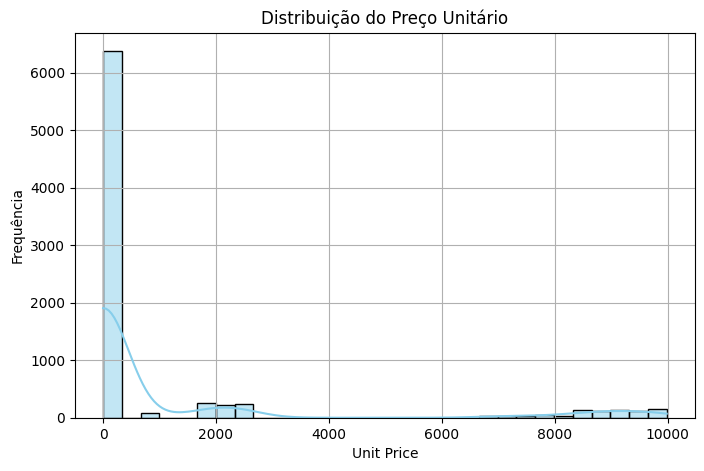

In [12]:
# Distribuição do Preço Unitário
plt.figure(figsize=(8, 5))
sns.histplot(df["Unit Price"], kde=True, bins=30, color='skyblue')
plt.title('Distribuição do Preço Unitário')
plt.xlabel('Unit Price')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

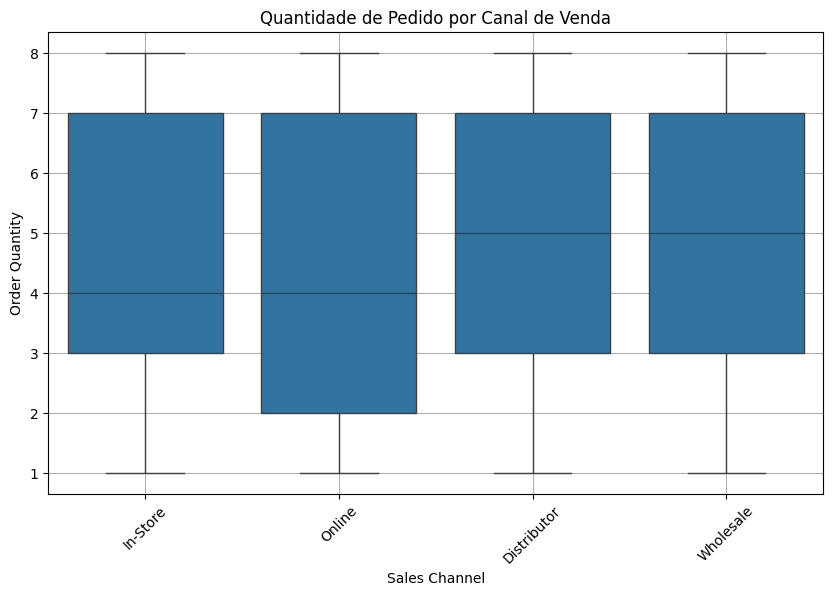

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sales Channel', y='Order Quantity', data=df)
plt.title('Quantidade de Pedido por Canal de Venda')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

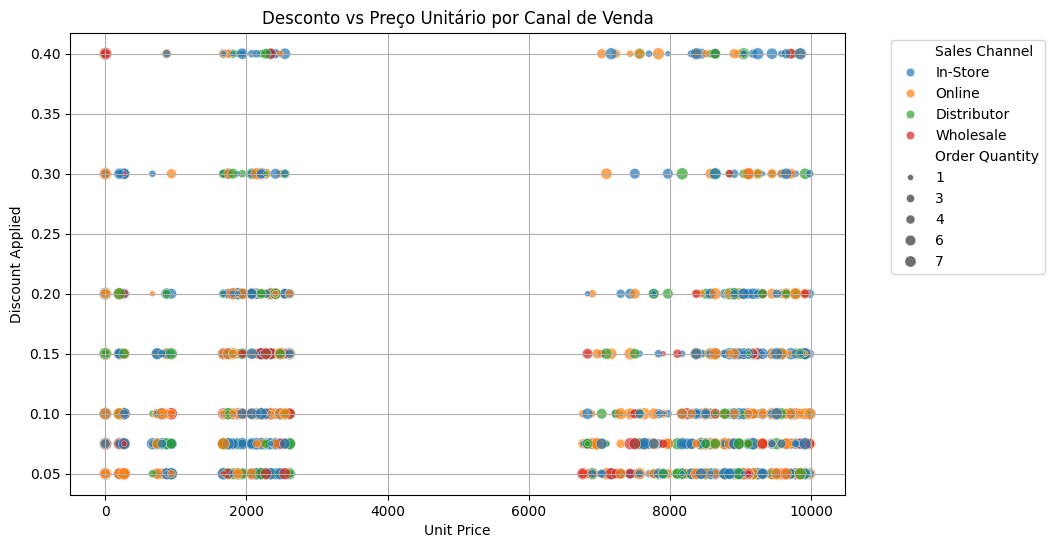

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Unit Price', y='Discount Applied', hue='Sales Channel', size='Order Quantity', alpha=0.7)
plt.title('Desconto vs Preço Unitário por Canal de Venda')
plt.xlabel('Unit Price')
plt.ylabel('Discount Applied')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


In [15]:
# Margem e Receita Total
df["Total Revenue"] = df["Order Quantity"] * df["Unit Price"]
df["Total Cost"] = df["Order Quantity"] * df["Unit Cost"]
df["Margin"] = df["Total Revenue"] - df["Total Cost"]

# Receita por canal
revenue_by_channel = df.groupby("Sales Channel")[["Total Revenue", "Margin"]].sum().sort_values(by="Total Revenue", ascending=False)
display(revenue_by_channel)

,Total Revenue,Margin
Sales Channel,,
In-Store,1.585758e+07,-3.140954e+08
Online,1.381948e+07,-2.448882e+08
Distributor,6.865331e+06,-1.366128e+08
Wholesale,4.465576e+06,-8.792877e+07


In [19]:
# transforme os numeros de notação cientifica para numeros inteiros

import pandas as pd
pd.options.display.float_format = '{:.0f}'.format
display(revenue_by_channel)


,Total Revenue,Margin
Sales Channel,,
In-Store,15857576,-314095407
Online,13819482,-244888244
Distributor,6865331,-136612781
Wholesale,4465576,-87928771


In [16]:
df.isnull().sum()

,0
OrderNumber,0
Sales Channel,0
WarehouseCode,0
ProcuredDate,0
OrderDate,0
ShipDate,0
DeliveryDate,0
CurrencyCode,0
_SalesTeamID,0
_CustomerID,0


<ipython-input-17-2925292520>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=warehouse_order_counts, x='WarehouseCode', y='Order Count', palette='viridis')


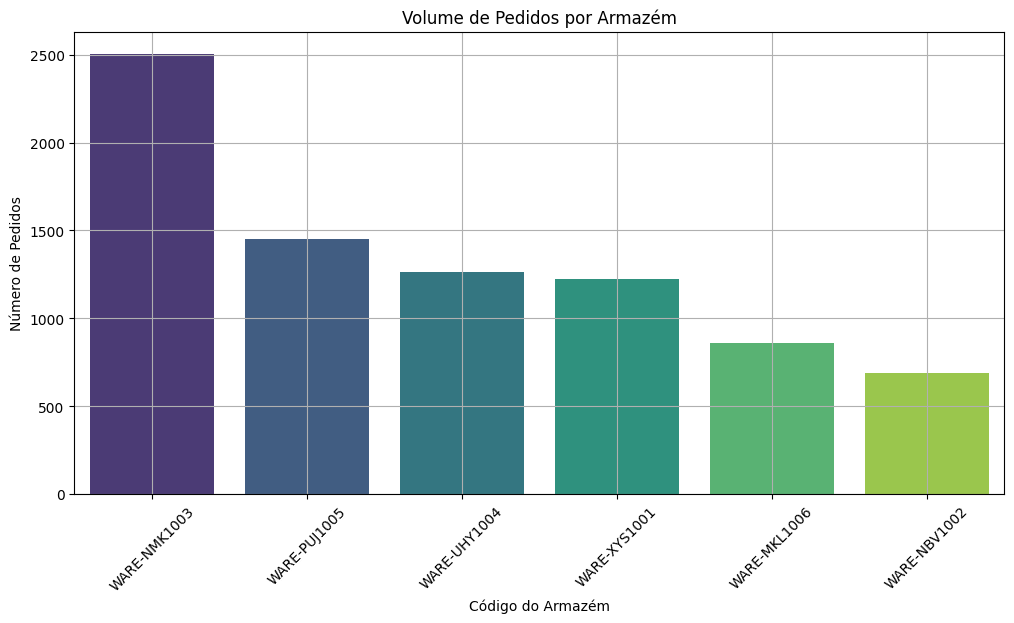

In [17]:
# Contagem de pedidos por armazém
warehouse_order_counts = df['WarehouseCode'].value_counts().reset_index()
warehouse_order_counts.columns = ['WarehouseCode', 'Order Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=warehouse_order_counts, x='WarehouseCode', y='Order Count', palette='viridis')
plt.title('Volume de Pedidos por Armazém')
plt.xticks(rotation=45)
plt.ylabel('Número de Pedidos')
plt.xlabel('Código do Armazém')
plt.grid(True)
plt.show()

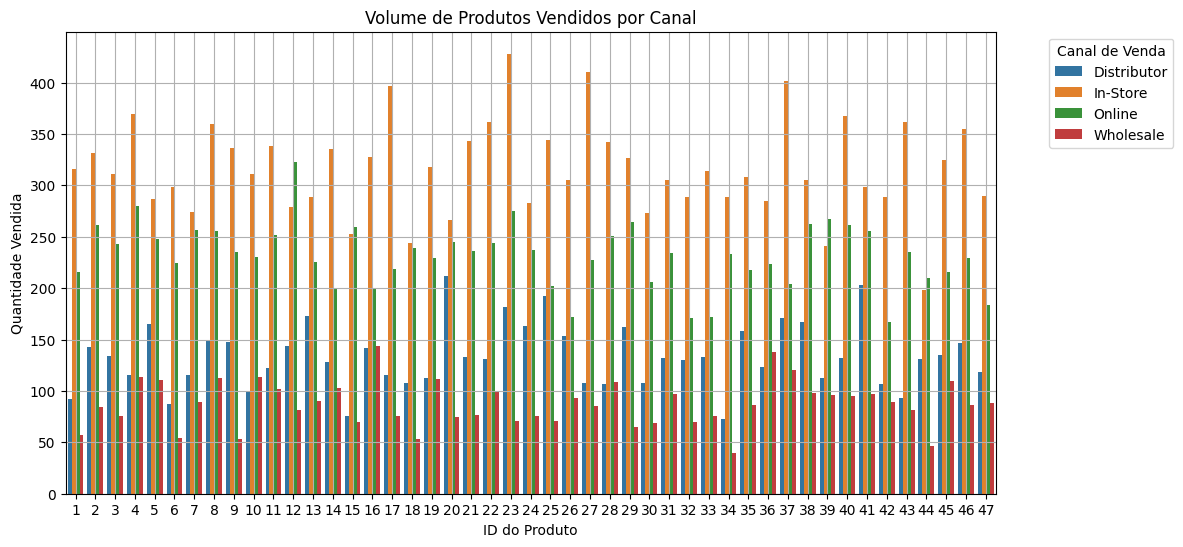

In [18]:
# Agrupamento por canal de venda e produto
product_channel_volume = df.groupby(['Sales Channel', '_ProductID'])['Order Quantity'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=product_channel_volume, x='_ProductID', y='Order Quantity', hue='Sales Channel')
plt.title('Volume de Produtos Vendidos por Canal')
plt.xlabel('ID do Produto')
plt.ylabel('Quantidade Vendida')
plt.legend(title='Canal de Venda', bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(True)
plt.show()